# Vectorizing Raw Data: TF-IDF

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

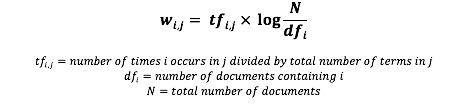

### Read in text

In [6]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [7]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


### Apply TfidfVectorizer to smaller sample

In [6]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [8]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_df

08002986030  08452810075over18  09061701461         1       100    100000  \
0      0.000000           0.198986     0.000000  0.000000  0.000000  0.000000   
1      0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
2      0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
3      0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
4      0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
5      0.000000           0.000000     0.231645  0.000000  0.000000  0.000000   
6      0.197682           0.000000     0.000000  0.000000  0.000000  0.000000   
7      0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
8      0.000000           0.000000     0.000000  0.000000  0.224905  0.000000   
9      0.000000           0.000000     0.000000  0.252972  0.000000  0.252972   
10     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
11     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
12     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
13     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
14     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
15     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
16     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
17     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
18     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   
19     0.000000           0.000000     0.000000  0.000000  0.000000  0.000000   

          11        12   150pday        16  ...       wet       win    winner  \
0   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.174912  0.000000   
1   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
5   0.000000  0.231645  0.000000  0.000000  ...  0.000000  0.000000  0.231645   
6   0.197682  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.224905  0.197695  ...  0.000000  0.197695  0.000000   
9   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0.000000  0.000000  ...  0.291197  0.000000  0.000000   
13  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.000000  0.185730  ...  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

        wkli      word  wwwdbuknet  xxxmobilemovieclub  \
0   0.198986  0.000000    0.000000            0.000000   
1   0.000000  0.000000    0.000000            0.000000   
2   0.000000  0.000000    0.000000            0.000000   
3   0.000000  0.000000    0.000000            0.000000   
4   0.000000  0.000000    0.000000            0.000000   
5   0.000000  0.000000    0.000000            0.000000   
6   0.000000  0.000000    0.000000            0.000000   
7   0.000000  0.000000    0.000000            0.000000   
8   0.000000  0.000000    0.000000            0.000000   
9   0.000000  0.2529